## Análisis Exploratorio de Datos – Viajeros 2023

## 1. Importación de librerías y carga de datos

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos y diccionario
ruta_datos = "viajeros_2023_datos_abiertos_final.xlsx"
ruta_diccionario = "diccionario-de-datos_viajeros_2023-da.xlsx"

df = pd.read_excel(ruta_datos)
dic = pd.read_excel(ruta_diccionario, header=0).iloc[:, :2]
dic.columns = ["variable", "descripcion"]
dic["variable"] = dic["variable"].astype(str).str.strip()

print(f"Dataset cargado: {df.shape[0]:,} filas y {df.shape[1]} columnas")
print(f"Diccionario cargado: {dic.shape[0]:,} variables")



Dataset cargado: 74,547 filas y 134 columnas
Diccionario cargado: 134 variables



**Explicación:** Se importan las librerías necesarias y se cargan tanto los datos principales como el diccionario de variables.


**Archivos utilizados:**
- `viajeros_2023_datos_abiertos_final.xlsx`: dataset original descargado desde Datos Abiertos Bogotá.
- `diccionario-de-datos_viajeros_2023-da.xlsx`: descripción oficial de variables y categorías.


## 2. Creación del resumen de metadatos

In [3]:

meta = pd.DataFrame({
    "variable": df.columns,
    "tipo_dato": df.dtypes.astype(str).values,
    "valores_nulos_%": (df.isnull().sum().values / len(df) * 100).round(2)
}).merge(dic, on="variable", how="left")

meta.head(10)


,variable,tipo_dato,valores_nulos_%,descripcion
0,Obs_ID,int64,0.00,Obs_ID
1,P_101,object,0.00,¿Vive usted en Bogotá?
2,P_102,object,72.65,¿Cuál es su lugar de visita?
3,P_102A,object,78.14,Departamento
4,P_102_B,object,94.35,Pais
5,P_103,object,73.07,¿Cuál es la principal razón o motivo de su viaje?
6,P_103,object,73.07,¿Cúal otro motivo de viaje?
7,P_103A,object,99.79,NaN
8,P_104,object,73.53,Sexo
9,P_105,object,73.29,"¿Cuánto dinero piensa gastar en este viaje, ex..."



**Explicación:** Esta tabla resume todas las variables, su tipo de dato, porcentaje de valores nulos y una descripción según el diccionario. 
Esto facilita entender el propósito de cada columna.


## 3. Vista general del dataset

In [4]:

df.shape, df.head(3)


((74547, 134),
    Obs_ID P_101     P_102    P_102A P_102_B                           P_103  \
 0       1    Si  Nacional  CASANARE     NaN  a. Vacaciones/recreación/Ocio    
 1       2    No       NaN       NaN     NaN                             NaN   
 2       3    No       NaN       NaN     NaN                             NaN   
 
   P_103A      P_104     P_105     P_105A  ...  P_501_J  P_501_K P_502_A  \
 0    NaN  a. Hombre  a. Pesos  3000000.0  ...      NaN      NaN     NaN   
 1    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   
 2    NaN        NaN       NaN        NaN  ...      NaN      NaN     NaN   
 
    P_502_B P_502_C P_502_D  P_502_E P_502_F P_502_G P_502_H  
 0      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 1      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 2      NaN     NaN     NaN      NaN     NaN     NaN     NaN  
 
 [3 rows x 134 columns])


**Explicación:** Se muestra el tamaño del dataset y las primeras filas para verificar su estructura.


## 4. Valores faltantes

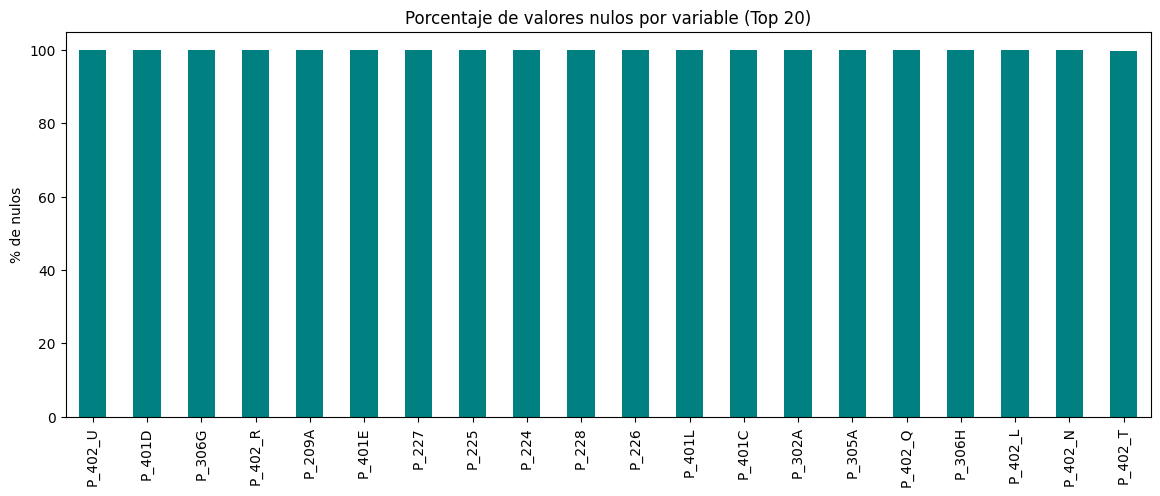

In [5]:

faltantes = df.isnull().mean().sort_values(ascending=False) * 100
plt.figure(figsize=(14,5))
faltantes.head(20).plot(kind='bar', color='teal')
plt.title("Porcentaje de valores nulos por variable (Top 20)")
plt.ylabel("% de nulos")
plt.show()



**Explicación:** Visualiza las variables con más valores faltantes. Esto ayuda a identificar posibles problemas de calidad de datos.


## 5. Resumen de variables numéricas

In [6]:

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Obs_ID,74547.0,3.727400e+04,2.152001e+04,1.0,18637.50,37274.000000,5.591050e+04,74547.0
P_105A,5507.0,1.323706e+06,3.274459e+06,0.0,300000.00,560000.000000,1.500000e+06,100000000.0
P_105B,779.0,2.496182e+03,4.013631e+03,50.0,600.00,1500.000000,3.000000e+03,50000.0
P_105C,175.0,2.380629e+03,2.780993e+03,5.0,1000.00,1600.000000,3.000000e+03,25000.0
P_106A,18934.0,1.668380e+01,9.388779e+01,0.0,3.00,4.000000,8.000000e+00,999.0
P108,19450.0,2.112751e+00,2.235157e+00,0.0,1.00,2.000000,3.000000e+00,100.0
P_205,46553.0,2.091251e+00,8.192903e+00,1.0,1.00,2.000000,2.000000e+00,999.0
P_207,8853.0,4.139761e+01,1.386261e+01,0.0,31.00,40.000000,5.100000e+01,88.0
P_213,872.0,4.194037e+01,1.630729e+01,3.0,30.00,39.000000,5.400000e+01,92.0
P_219,166.0,3.056024e+01,1.639750e+01,4.0,19.00,29.000000,4.000000e+01,76.0



**Explicación:** Se presentan estadísticas descriptivas (promedio, desviación estándar, etc.) para las variables numéricas.


## 6. Variables categóricas destacadas

In [7]:

cat_cols = df.select_dtypes(include='object').columns[:5]

for col in cat_cols:
    desc = dic.loc[dic['variable'] == col, 'descripcion'].values
    descripcion = desc[0] if len(desc) > 0 else col
    print(f"\n### {col} – {descripcion}")
    print(df[col].value_counts(normalize=True).head(5))



### P_101 – ¿Vive usted en Bogotá?
P_101
No    0.724094
Si    0.275906
Name: proportion, dtype: float64

### P_102 – ¿Cuál es su lugar de visita?
P_102
Nacional         0.793506
Internacional    0.206494
Name: proportion, dtype: float64

### P_102A – Departamento
P_102A
BOYACÁ          0.151764
CUNDINAMARCA    0.121387
Ns/Nr           0.074870
TOLIMA          0.072660
ANTIOQUIA       0.063823
Name: proportion, dtype: float64

### P_102_B – Pais
P_102_B
Estados Unidos    0.210214
España            0.179335
Ecuador           0.100950
Perú              0.086461
Panamá            0.077197
Name: proportion, dtype: float64

### P_103 – ¿Cuál es la principal razón o motivo de su viaje?
P_103
b. Visita a familiares y amigos         0.415210
a. Vacaciones/recreación/Ocio           0.330246
h. Trabajo remunerado en otra ciudad    0.155038
g. Negocios y motivos profesionales     0.059565
c. Educación y formación                0.014692
Name: proportion, dtype: float64


#### 7.Gráficas de algunas de las variables más relevantes

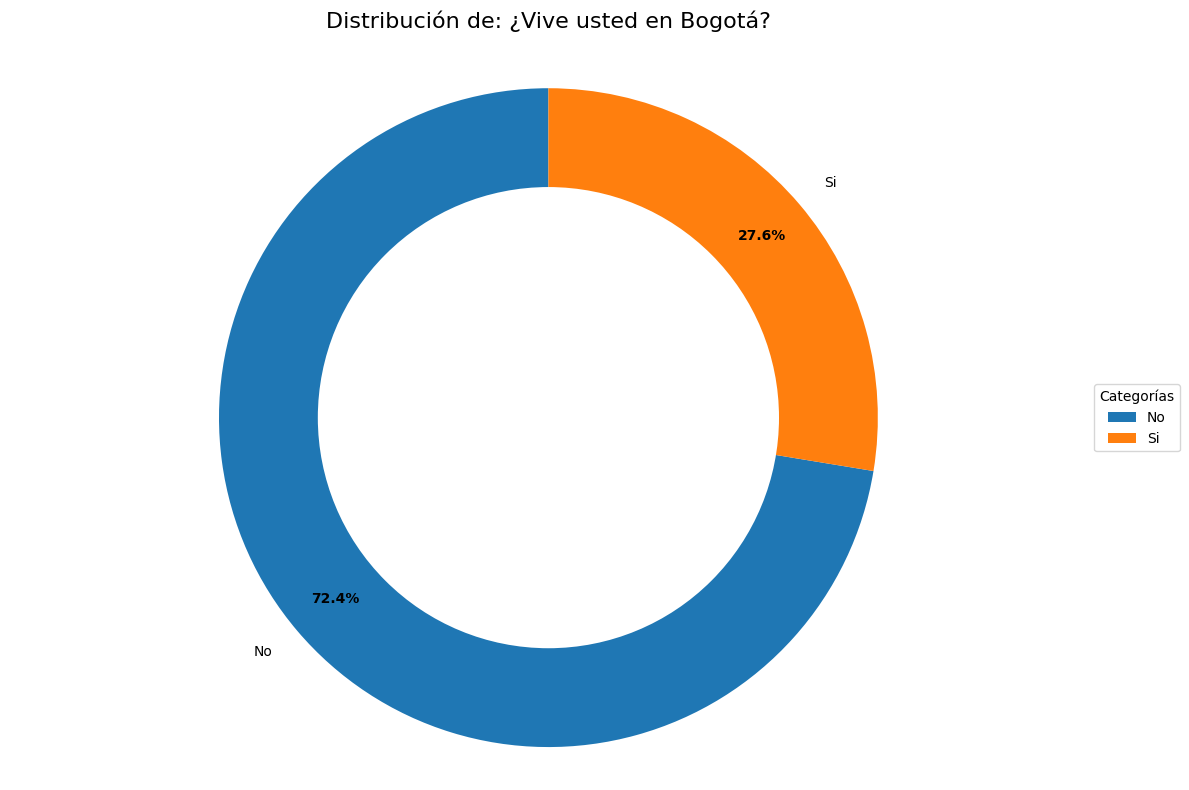

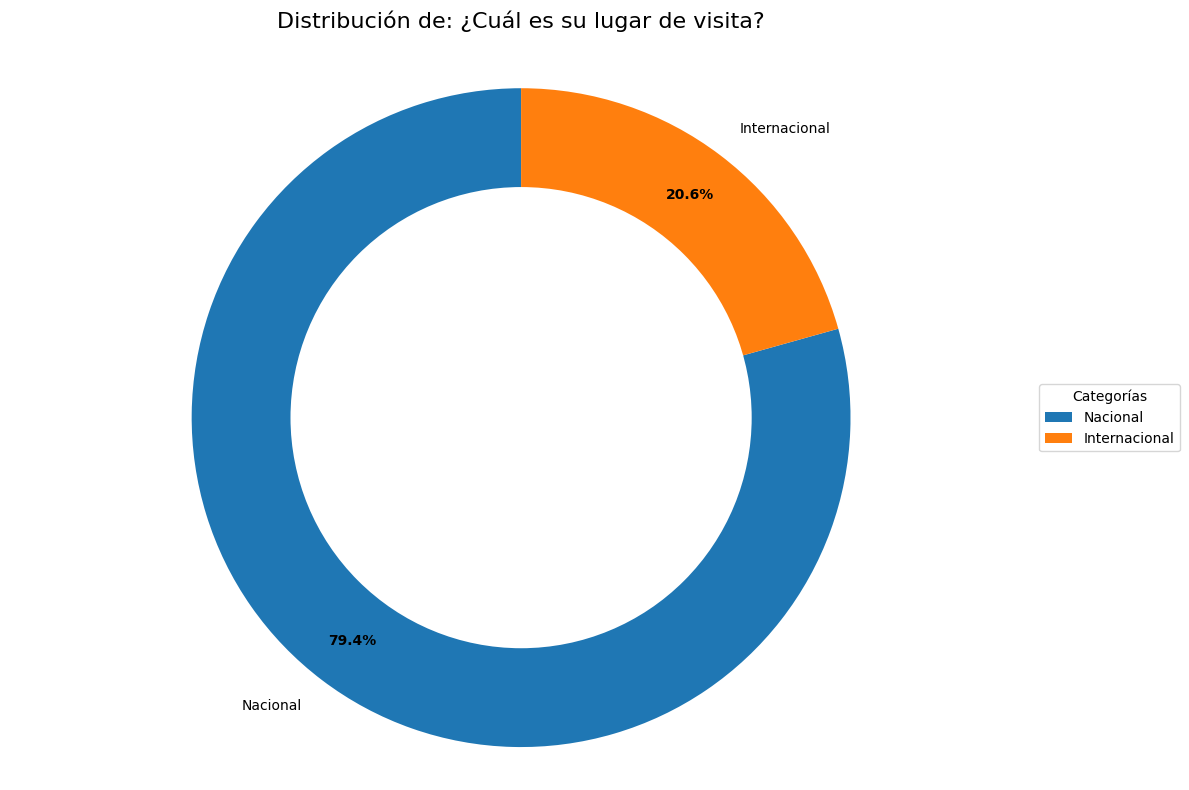

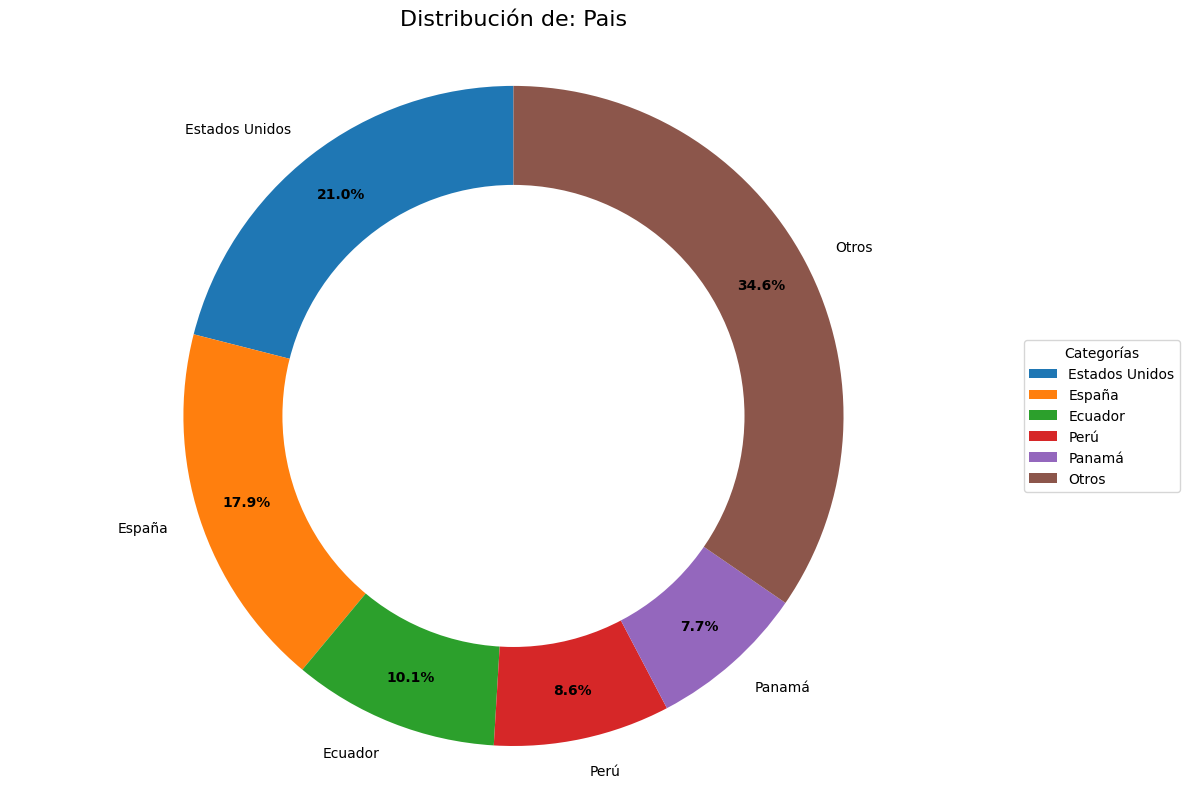

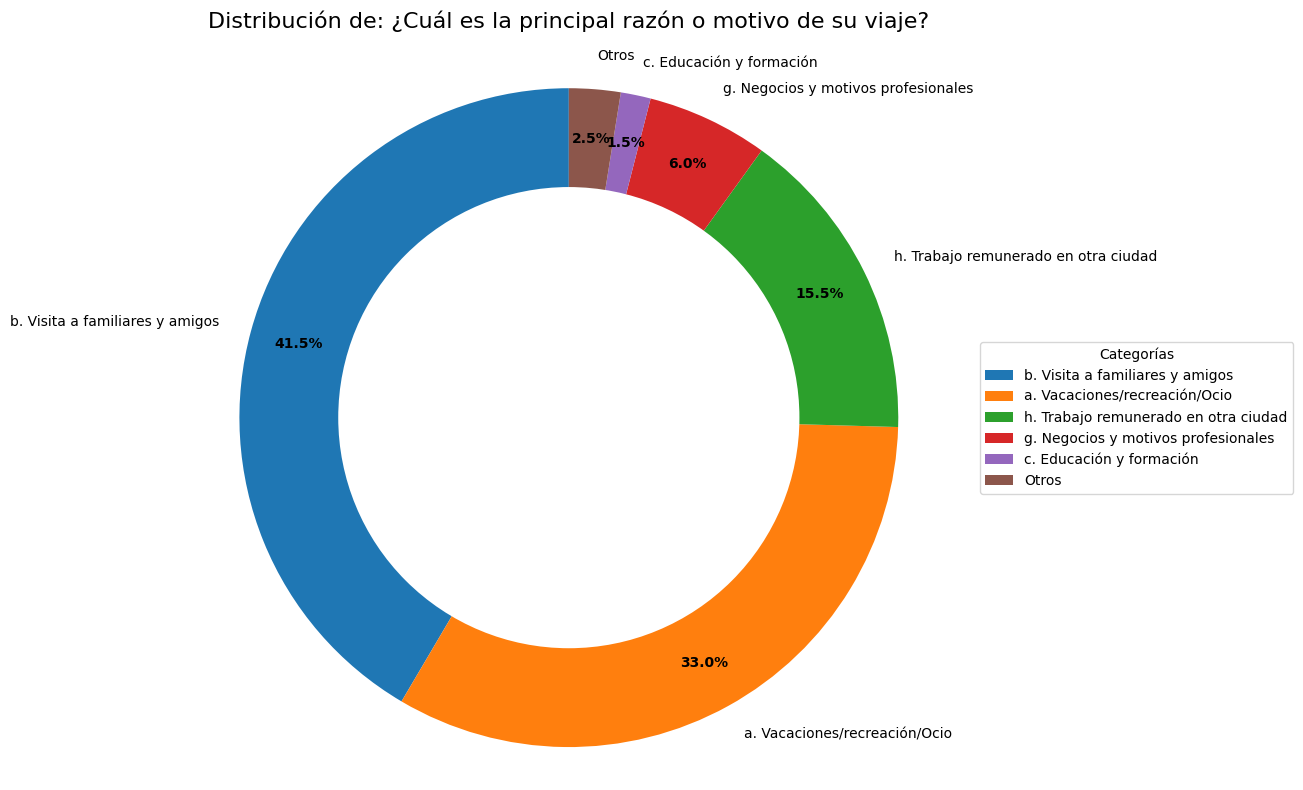

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Columnas a graficar
cols_para_pie = ['P_101', 'P_102', 'P_102_B', 'P_103']

for col in cols_para_pie:
    try:
        desc = dic.loc[dic['variable'] == col, 'descripcion'].values
        titulo = desc[0] if len(desc) > 0 else col
    except KeyError:
        print(f"Advertencia: No se pudo encontrar la descripción para {col}. Usando el ID.")
        titulo = col
    except Exception as e:
        print(f"Error al buscar descripción de {col}: {e}")
        titulo = col

    counts_normalizadas = df[col].value_counts(normalize=True, dropna=True)

    # Top 5 
    if len(counts_normalizadas) > 5:
        top_5 = counts_normalizadas.head(5)
        otros_sum = counts_normalizadas.iloc[5:].sum()
        
        data_para_plot = pd.concat([top_5, pd.Series({'Otros': otros_sum})])
        
    else:
        data_para_plot = counts_normalizadas

    plt.figure(figsize=(12, 8))
    
    wedges, texts, autotexts = plt.pie(
        data_para_plot,
        autopct='%1.1f%%', 
        startangle=90,
        pctdistance=0.85, 
        labels=data_para_plot.index,
        textprops={'color':"w"} 
    )
    
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_weight('bold')
        
    for text in texts:
        text.set_color('black')

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title(f'Distribución de: {titulo}', fontsize=16, pad=20)
    plt.axis('equal')  
    
    plt.legend(
        data_para_plot.index, 
        title="Categorías", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1) 
    )
    
    plt.tight_layout() 
    plt.show()





**Explicación:** Se muestran las categorías más frecuentes de las variables cualitativas, junto con su descripción del diccionario.


**Observación:**  
- El 72 % de los viajeros no reside en Bogotá y el 79 % realiza viajes nacionales.  
- Los principales países de origen son Estados Unidos, España, Ecuador y Perú.  
- El motivo de viaje predominante es la visita a familiares y amigos (41 %), seguido de actividades recreativas (33 %).  
Estos patrones confirman que el turismo en Bogotá es principalmente doméstico y familiar, con una minoría internacional significativa.


## 8. Correlación entre variables numéricas

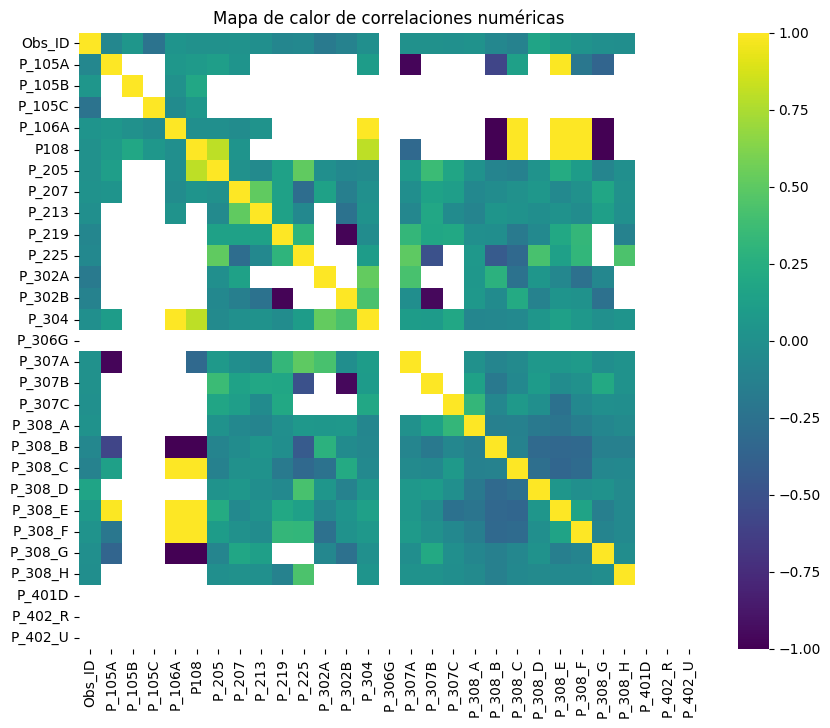

In [9]:

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), cmap='viridis', center=0)
plt.title("Mapa de calor de correlaciones numéricas")
plt.show()


**Observación:**  
Se observan correlaciones positivas entre las variables de gasto (`P_307A`, `P_307B`, `P_307C`) y algunas relacionadas con la duración de la estadía (`P_304`).  
Esto sugiere que el gasto total tiende a aumentar con el número de noches o días en la ciudad, lo cual es coherente con el comportamiento esperado del viajero.  
También se aprecian grupos de variables altamente correlacionadas entre sí, que podrían indicar redundancia o variables derivadas del mismo fenómeno.


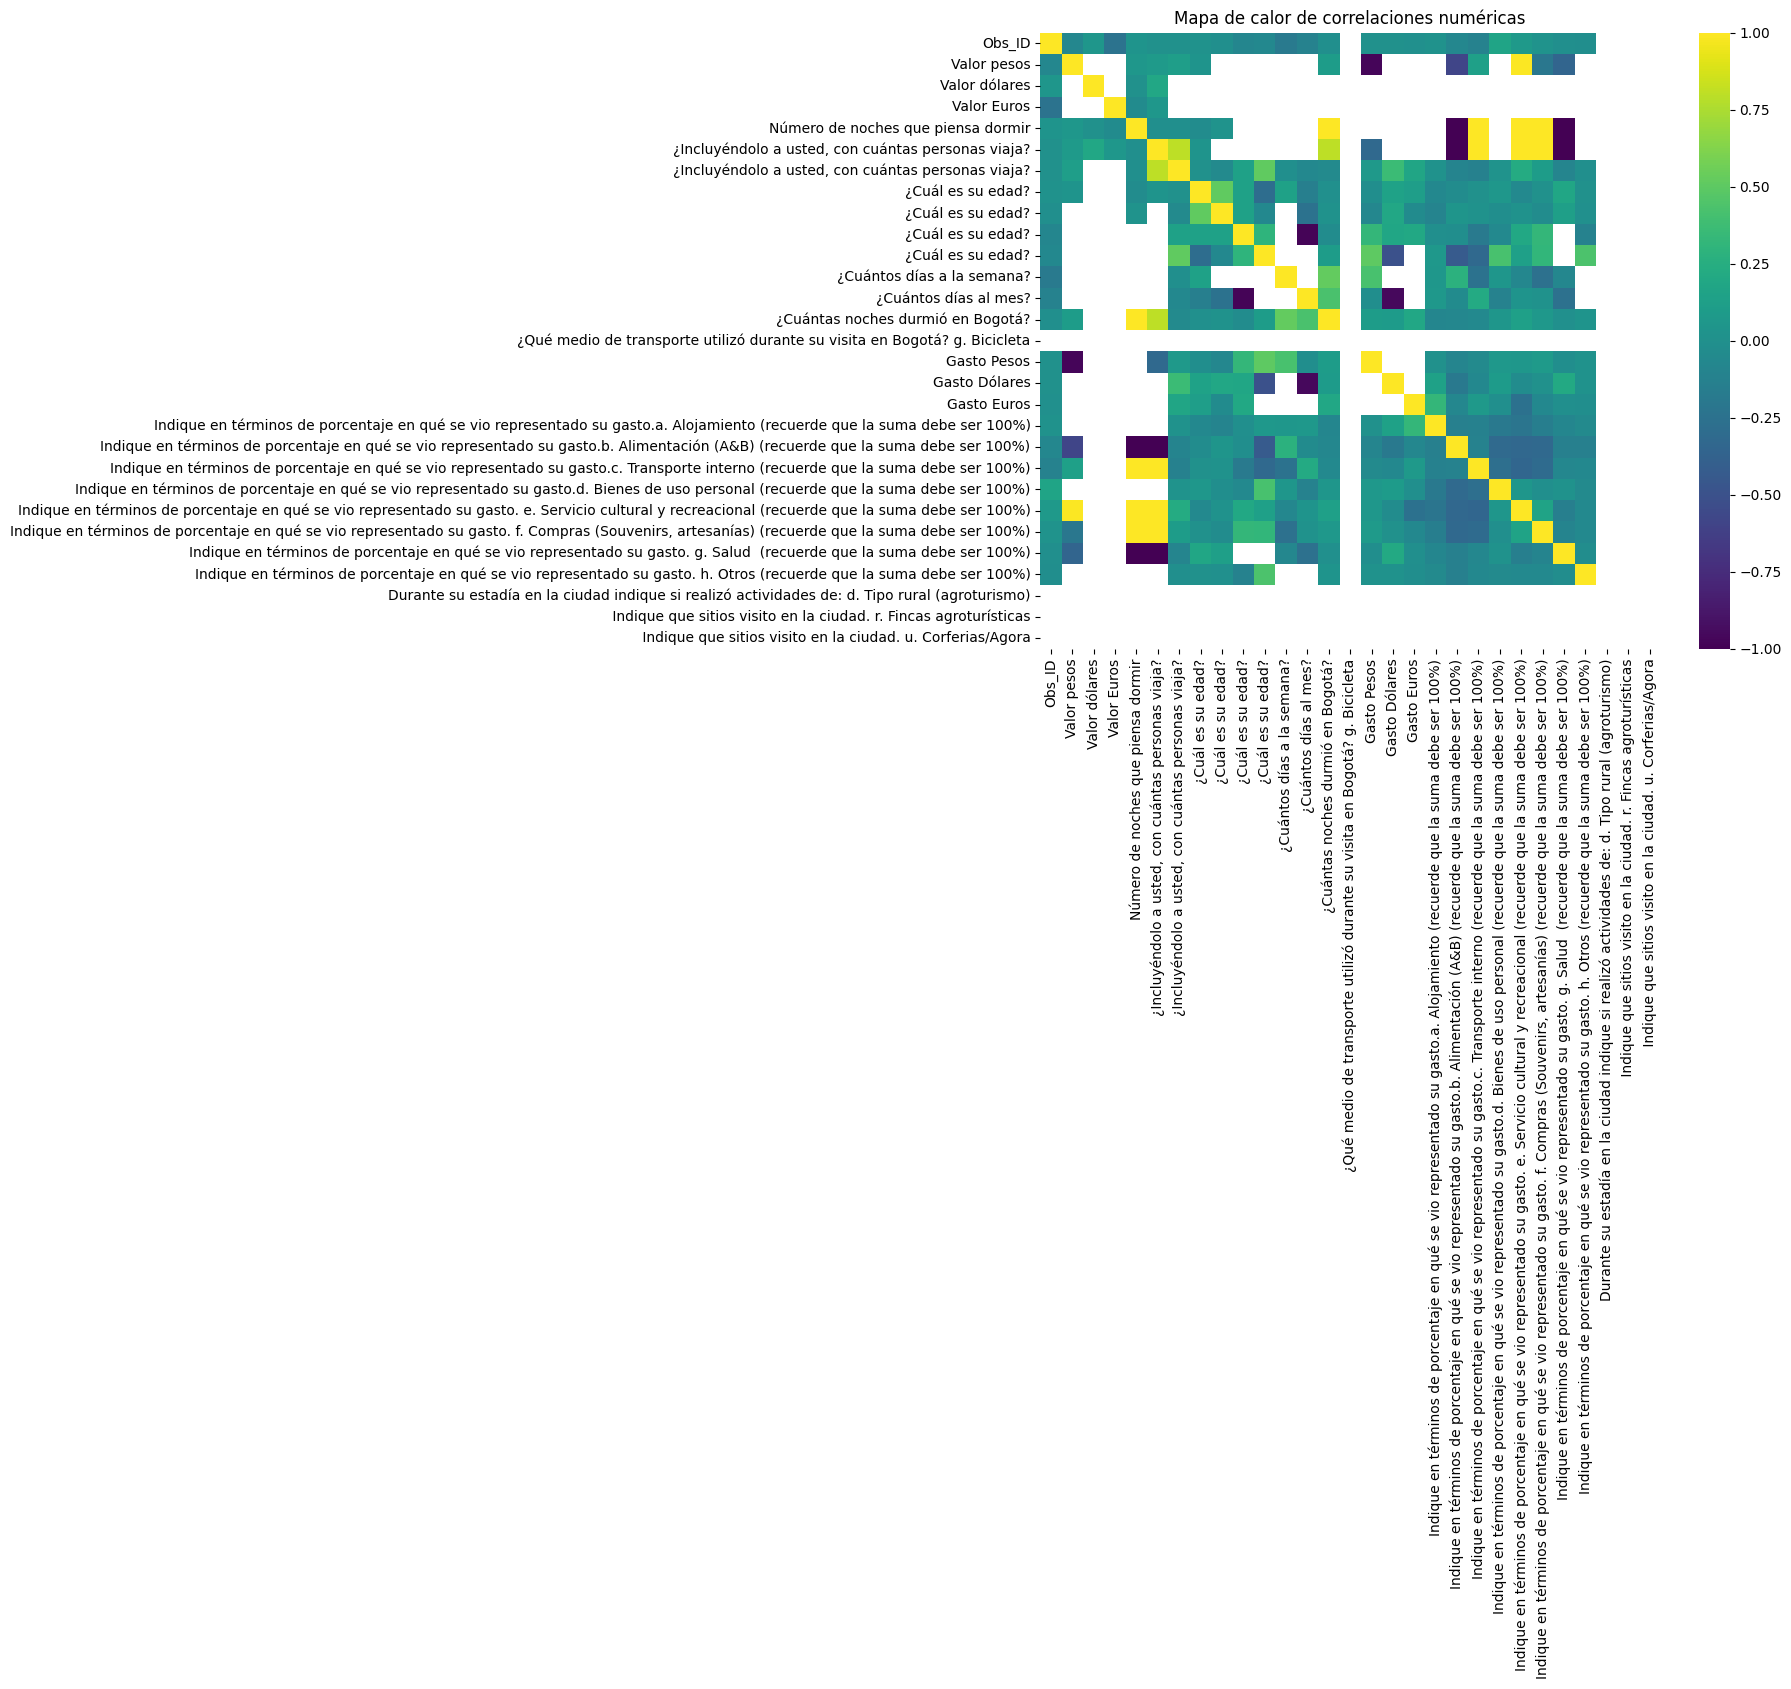

In [10]:
# Crear el diccionario de mapeo
mapa_nombres = dic.set_index('variable')['descripcion'].to_dict()

# Calcular la matriz de correlación
matriz_corr = df[num_cols].corr()

# Renombrar el índice (eje Y) y las columnas (eje X) de la matriz
matriz_corr_desc = matriz_corr.rename(index=mapa_nombres, columns=mapa_nombres)

# Graficar la matriz renombrada
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr_desc, cmap='viridis', center=0)
plt.title("Mapa de calor de correlaciones numéricas")
plt.show()


**Explicación:** Se observa la relación lineal entre variables numéricas. Una alta correlación puede indicar redundancia o asociaciones relevantes.


## 9. Relación entre estadia y gasto total

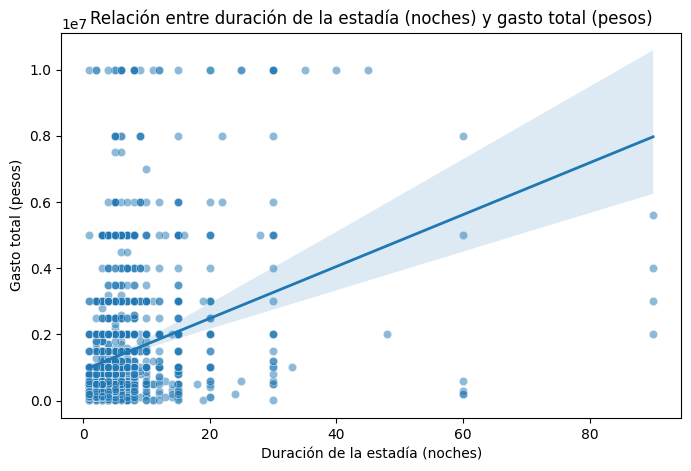

In [11]:
# --- 1) Elegir columnas reales ---
col_duracion = "P_304"   # Noches en Bogotá (observado)
col_gasto    = "P_307A"  # Gasto Pesos (observado)

# --- 2) Asegurar numéricos y filtrar válidos ---
df[col_duracion] = pd.to_numeric(df[col_duracion], errors='coerce')
df[col_gasto]    = pd.to_numeric(df[col_gasto],    errors='coerce')

tmp = df[[col_duracion, col_gasto]].dropna()
tmp = tmp[(tmp[col_duracion] > 0) & (tmp[col_gasto] > 0)]

# (opcional) winsorizar p99 para que no te exploten 2–3 outliers
p99 = tmp[col_gasto].quantile(0.99)
tmp_win = tmp.copy()
tmp_win[col_gasto] = tmp_win[col_gasto].clip(upper=p99)

# --- 3) Scatter + tendencia (sobre datos winsorizados) ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=col_duracion, y=col_gasto, data=tmp_win, alpha=0.5)
sns.regplot(x=col_duracion, y=col_gasto, data=tmp_win, scatter=False, line_kws={'linewidth':2})
plt.title("Relación entre duración de la estadía (noches) y gasto total (pesos)")
plt.xlabel("Duración de la estadía (noches)")
plt.ylabel("Gasto total (pesos)")
plt.show()


**Observación:**  
La gráfica muestra una correlación positiva entre la duración de la estadía y el gasto total.  
Los viajeros que permanecen más noches en Bogotá tienden a gastar más, aunque existe alta dispersión en valores bajos, probablemente por diferencias en tipo de alojamiento, propósito del viaje y poder adquisitivo.  
La relación no es perfecta, pero sí significativa, lo que sugiere que la duración es un buen predictor del gasto promedio.


## 10. Gasto_promedio_dia

In [12]:
df["gasto_promedio_dia"] = df["P_307A"] / df["P_304"]
df["gasto_promedio_dia"] = pd.to_numeric(df["gasto_promedio_dia"], errors='coerce')


In [13]:
def resumen_robusto(serie):
    s = pd.Series(serie.dropna())
    return pd.Series({
        "n": s.size,
        "mediana": s.median(),
        "p25": s.quantile(0.25),
        "p75": s.quantile(0.75),
        "IQR": s.quantile(0.75) - s.quantile(0.25)
    })

resumen_gasto = resumen_robusto(df["P_307A"])
resumen_gpd   = resumen_robusto(df["gasto_promedio_dia"])
display(resumen_gasto, resumen_gpd)


n             1969.0
mediana     600000.0
p25         200000.0
p75        1500000.0
IQR        1300000.0
dtype: float64

n            1748.000000
mediana    166666.666667
p25         83333.333333
p75        333333.333333
IQR        250000.000000
dtype: float64

## 11. Conclusiones generales


- Se identificaron **134 variables**, con predominancia de tipo **categórico** y una estructura compleja que combina preguntas de identificación, comportamiento y gasto.  
- Se integró el **diccionario de datos**, permitiendo vincular cada variable con su descripción y facilitando el análisis interpretativo.  
- Se detectaron variables con más del **50% de valores faltantes**, lo que sugiere la necesidad de **limpieza, imputación o exclusión** antes del modelado.  
- Los análisis mostraron que el **gasto total** y el **gasto promedio diario** presentan **alta dispersión** y valores atípicos, por lo cual se aplicaron medidas robustas (mediana, IQR) y winsorización para mitigar su efecto.  
- Se evidenció una **correlación positiva entre la duración de la estadía y el gasto total**, coherente con el comportamiento esperado de los viajeros.  
- Las estadísticas descriptivas, visualizaciones y correlaciones servirán como base para el **prototipo analítico y la etapa de modelado predictivo**, orientada a estimar el gasto turístico en Bogotá.



In [14]:
import os
import pandas as pd

# Crear carpeta de salida
os.makedirs("data/processed", exist_ok=True)

# Definir columnas relevantes y exportar
df_out = df[[col_duracion, col_gasto, "gasto_promedio_dia"]].dropna()
output_path = "data/processed/viajeros_2023_preliminar.parquet"
df_out.to_parquet(output_path, index=False)  # Requiere pyarrow o fastparquet

# Verificación rápida
print(f"Archivo guardado correctamente en: {output_path}")
print(f"Filas: {len(df_out)}, Columnas: {len(df_out.columns)}")



Archivo guardado correctamente en: data/processed/viajeros_2023_preliminar.parquet
Filas: 1748, Columnas: 3
